In [5]:
import pandas as pd
import numpy as np

# Cargar datos de CRISPR Gene Effect
df = pd.read_csv("../csv2/CRISPRGeneEffect.csv")

# Cargar información de líneas celulares para mostrar resumen inicial
cell_lines_file = "../csv2/cell_lines_PDAC.csv"
try:
    cell_lines_df = pd.read_csv(cell_lines_file)
    
    # Obtener DepMap IDs disponibles en los datos de CRISPR
    available_depmap_ids = set(df[df.columns[0]].values)
    
    # Filtrar líneas celulares de PDAC que están disponibles en CRISPR data
    pdac_in_crispr = []
    for _, row in cell_lines_df.iterrows():
        depmap_id = row[cell_lines_df.columns[0]]
        if depmap_id in available_depmap_ids:
            pdac_in_crispr.append({
                'DepMap_ID': depmap_id,
                'Cell_Line': row[cell_lines_df.columns[1]],
                'Tumor_Type': row[cell_lines_df.columns[-1]]
            })
    
    # Crear DataFrame para el resumen
    summary_df = pd.DataFrame(pdac_in_crispr)
    
    # Buscar genes EHMT2 y PRMT7 en las columnas de CRISPR
    ehmt2_col = None
    prmt7_col = None
    for col in df.columns:
        if 'EHMT2' in col:
            ehmt2_col = col
        if 'PRMT7' in col:
            prmt7_col = col
    
    print("="*80)
    print("RESUMEN DE LÍNEAS CELULARES PARA CRISPR KO GENE EFFECT ANALYSIS")
    print("="*80)
    print()
    
    if not summary_df.empty and ehmt2_col and prmt7_col:
        # Crear tabla con formato similar al adjunto
        print(f"{'Línea Celular':<25} {'Tipo Tumoral':<15} {'KO score'}")
        print(f"{'(Nombre + DepMap ID)':<25} {'':<15} {''}")
        print("-" * 65)
        
        # Ordenar por tipo tumoral y luego por nombre de línea celular
        summary_sorted = summary_df.sort_values(['Tumor_Type', 'Cell_Line'])
        
        for _, row in summary_sorted.iterrows():
            depmap_id = row['DepMap_ID']
            cell_line = row['Cell_Line']
            tumor_type = row['Tumor_Type']
            
            # Obtener valores KO de CRISPR
            mask = df[df.columns[0]] == depmap_id
            if mask.any():
                ehmt2_score = df.loc[mask, ehmt2_col].iloc[0]
                prmt7_score = df.loc[mask, prmt7_col].iloc[0]
                
                # Formatear nombre con DepMap ID
                cell_info = f"{cell_line} ({depmap_id})"
                
                print(f"{cell_info:<25} {tumor_type:<15} EHMT2: {ehmt2_score:.4f}")
                print(f"{'':<25} {'':<15} PRMT7: {prmt7_score:.4f}")
                print()
        
        # Estadísticas finales
        tumor_counts = summary_df['Tumor_Type'].value_counts()
        print("-" * 65)
        print(f"TOTAL DE LÍNEAS CELULARES ANALIZADAS: {len(summary_df)}")
        for tumor_type, count in tumor_counts.items():
            print(f"  • {tumor_type}: {count} líneas celulares")
        print()
        print(f"Genes analizados: EHMT2 ({ehmt2_col}), PRMT7 ({prmt7_col})")
        print("="*80)
    
    else:
        print("❌ No se encontraron datos suficientes para el análisis")
        
except Exception as e:
    print(f"Error al cargar datos: {e}")

RESUMEN DE LÍNEAS CELULARES PARA CRISPR KO GENE EFFECT ANALYSIS

Línea Celular             Tipo Tumoral    KO score
(Nombre + DepMap ID)                      
-----------------------------------------------------------------
ASPC1 (ACH-000222)        Metastatic      EHMT2: -0.2329
                                          PRMT7: -0.1678

CAPAN1 (ACH-000354)       Metastatic      EHMT2: -0.2952
                                          PRMT7: -0.2128

CFPAC1 (ACH-000138)       Metastatic      EHMT2: -0.3552
                                          PRMT7: -0.2411

HPAFII (ACH-000094)       Metastatic      EHMT2: -0.4020
                                          PRMT7: -0.3479

HS766T (ACH-000178)       Metastatic      EHMT2: -0.5380
                                          PRMT7: -0.0157

HUPT3 (ACH-000118)        Metastatic      EHMT2: -0.2183
                                          PRMT7: -0.1332

HUPT4 (ACH-000213)        Metastatic      EHMT2: -0.1232
                            

=== INFORMACIÓN DE LÍNEAS CELULARES CARGADA ===
Archivo: ../csv2/cell_lines_PDAC.csv
Columnas disponibles: ['Depmap Id', 'Cell Line', 'Primary Disease', 'Tumor Type']
Total de líneas celulares: 64

Primeras 5 filas:
    Depmap Id      Cell Line            Primary Disease  Tumor Type
0  ACH-000266         SNU213  Pancreatic Adenocarcinoma     Primary
1  ACH-001376      PACADD135  Pancreatic Adenocarcinoma  Metastatic
2  ACH-000042       PANC0203  Pancreatic Adenocarcinoma     Primary
3  ACH-000652          SUIT2  Pancreatic Adenocarcinoma  Metastatic
4  ACH-003429  CCLFPANC0074T  Pancreatic Adenocarcinoma  Metastatic

=== LÍNEAS CELULARES DE PDAC DISPONIBLES EN CRISPR ===
Total encontradas: 45
     DepMap_ID  Cell_Line  Tumor_Type
0   ACH-000266     SNU213     Primary
1   ACH-000042   PANC0203     Primary
2   ACH-000652      SUIT2  Metastatic
3   ACH-000093   PANC0504     Primary
4   ACH-000139   PANC0327     Primary
5   ACH-000502    TCCPAN2  Metastatic
6   ACH-000235   PANC0403     Pr

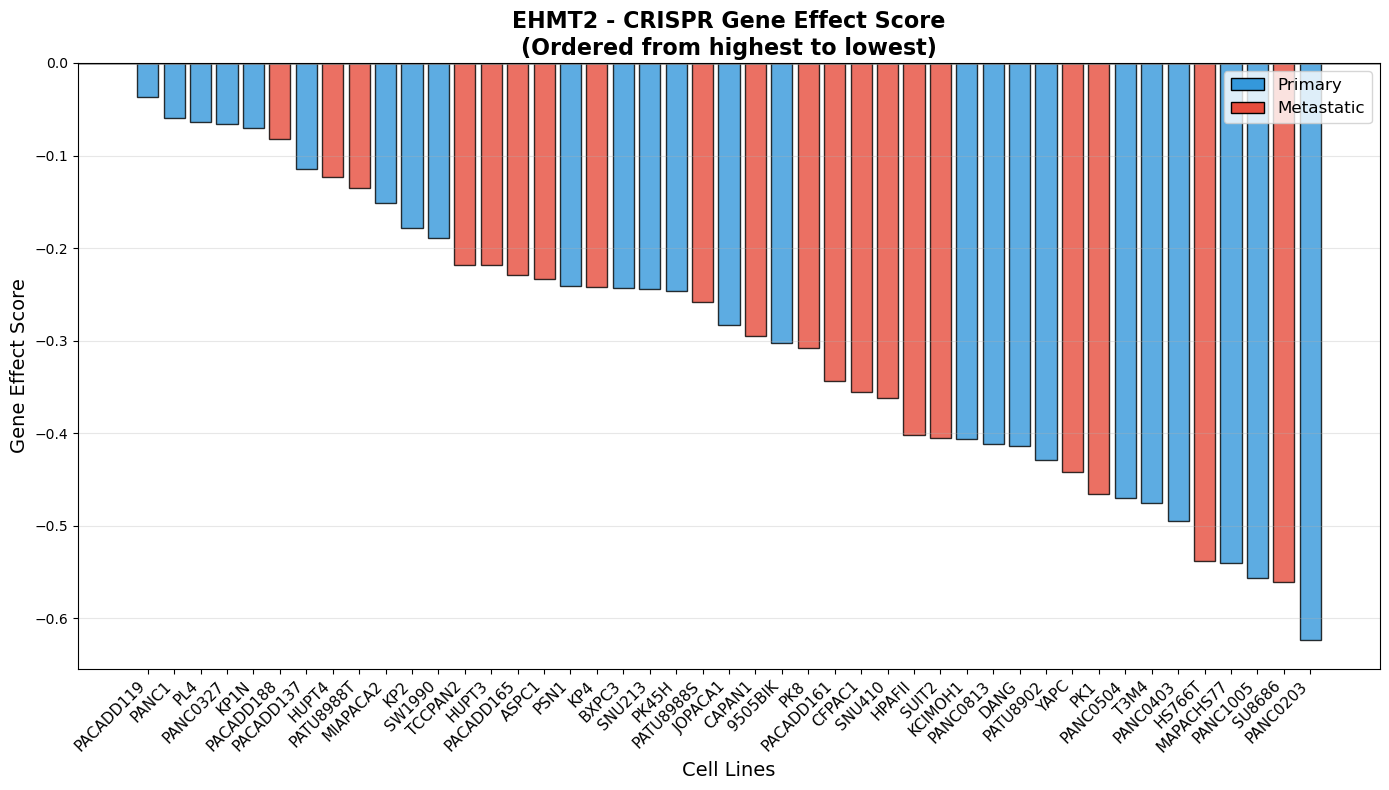

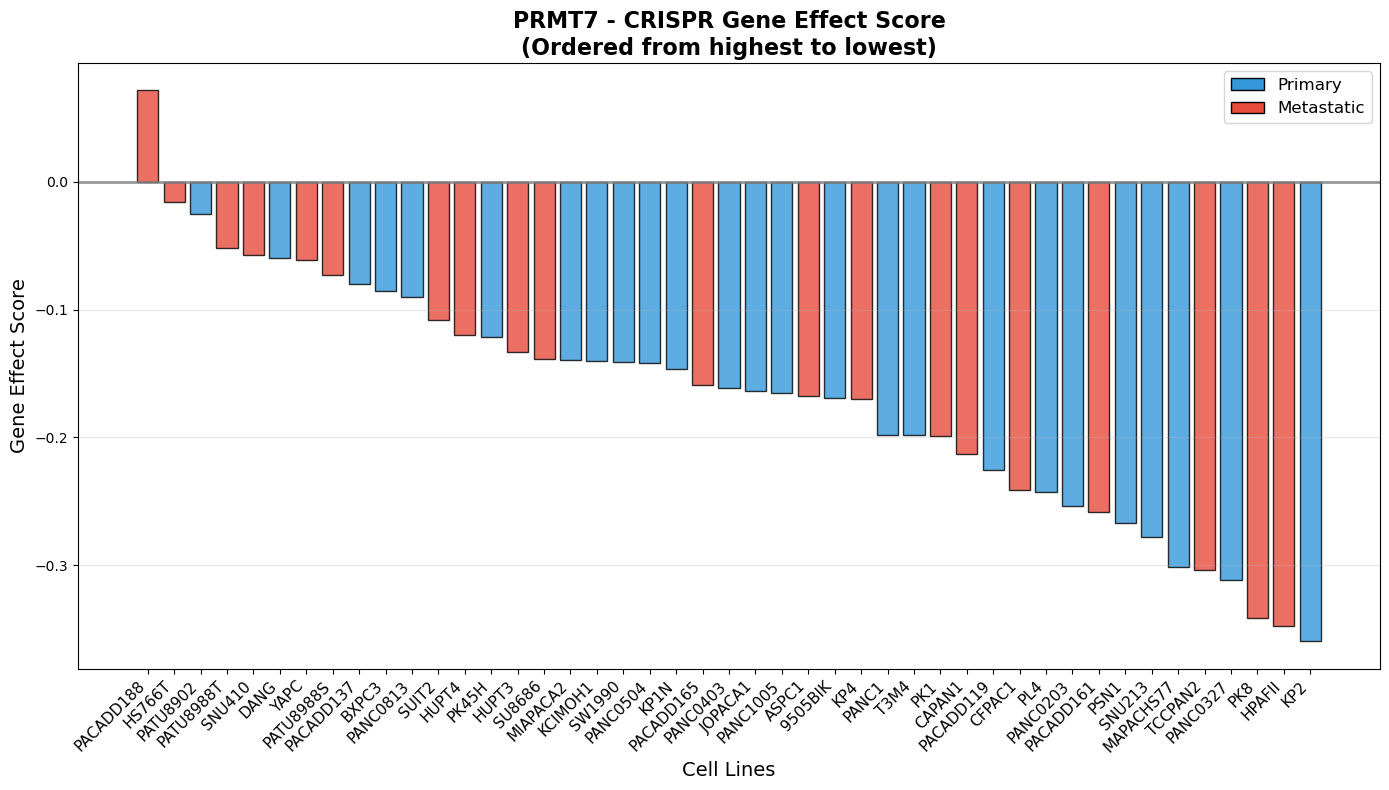


=== ESTADÍSTICAS POR TIPO TUMORAL ===
           EHMT2_effect         PRMT7_effect        
                   mean     std         mean     std
Tumor_Type                                          
Metastatic      -0.3108  0.1326      -0.1543  0.1097
Primary         -0.2924  0.1785      -0.1787  0.0843


C:\Users\alvar\AppData\Local\Temp\ipykernel_1216\3099050398.py:198: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=results_df, x='Tumor_Type', y='EHMT2_effect', ax=ax1, palette=colors)
C:\Users\alvar\AppData\Local\Temp\ipykernel_1216\3099050398.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=results_df, x='Tumor_Type', y='PRMT7_effect', ax=ax2, palette=colors)


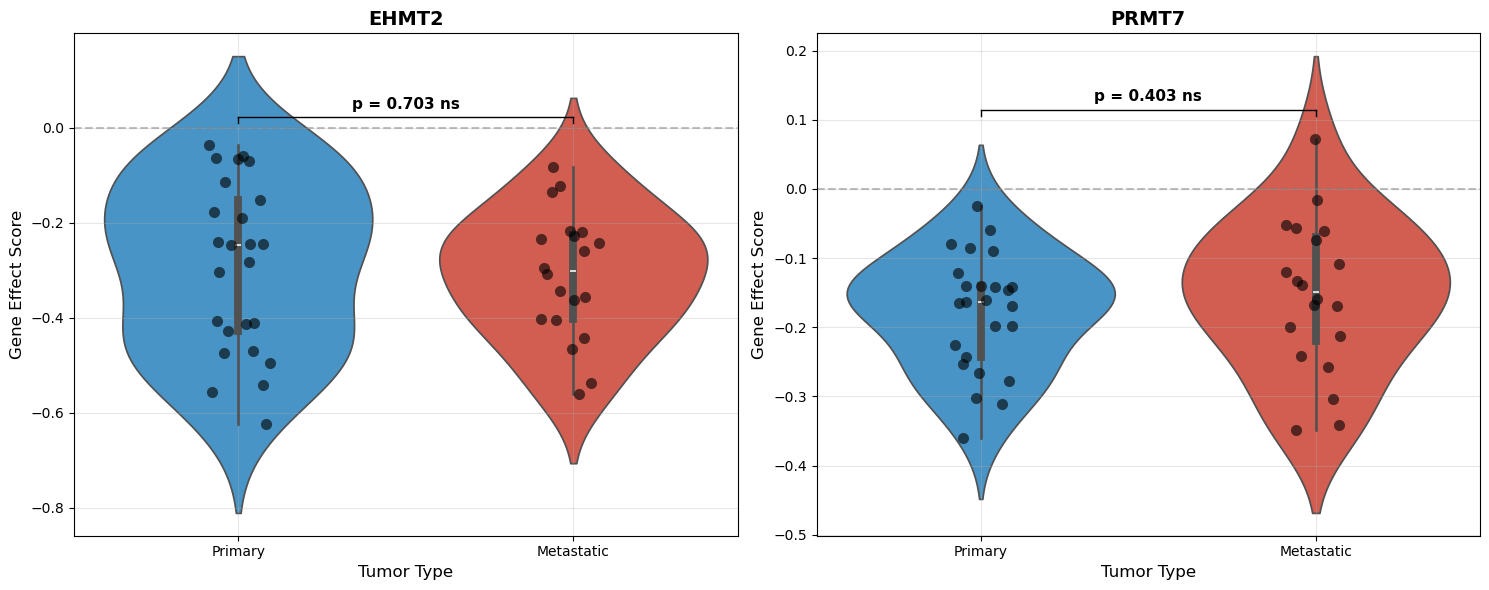


=== ANÁLISIS ESTADÍSTICO DETALLADO ===

EHMT2:
  Primary: μ = -0.2924 ± 0.1749 (n=25)
  Metastatic: μ = -0.3108 ± 0.1292 (n=20)
  t-test: t = 0.3838, p = 0.7030
  • No hay diferencia estadísticamente significativa (p ≥ 0.05)

PRMT7:
  Primary: μ = -0.1787 ± 0.0826 (n=25)
  Metastatic: μ = -0.1543 ± 0.1069 (n=20)
  t-test: t = -0.8440, p = 0.4033
  • No hay diferencia estadísticamente significativa (p ≥ 0.05)

✅ ANÁLISIS COMPLETADO
📊 Total de líneas celulares analizadas: 45


In [6]:
# Crear visualizaciones de CRISPR Gene Effect por tipo tumoral
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Cargar información de líneas celulares desde el archivo CSV
cell_lines_file = "../csv2/cell_lines_PDAC.csv"
try:
    cell_lines_df = pd.read_csv(cell_lines_file)
    print("=== INFORMACIÓN DE LÍNEAS CELULARES CARGADA ===")
    print(f"Archivo: {cell_lines_file}")
    print(f"Columnas disponibles: {list(cell_lines_df.columns)}")
    print(f"Total de líneas celulares: {len(cell_lines_df)}")
    print("\nPrimeras 5 filas:")
    print(cell_lines_df.head())
    
    # Crear diccionario de mapeo DepMap ID -> información de línea celular
    # Asumiendo que las columnas son algo como: DepMap_ID, Cell_Line, Primary_Disease, Tumor_Type
    # Ajustar nombres de columnas según tu archivo real
    depmap_col = cell_lines_df.columns[0]  # Primera columna debería ser DepMap ID
    cell_name_col = cell_lines_df.columns[1]  # Segunda columna debería ser nombre de línea celular
    tumor_type_col = cell_lines_df.columns[-1]  # Última columna debería ser tipo tumoral
    
    # Crear diccionarios de mapeo
    depmap_to_name = dict(zip(cell_lines_df[depmap_col], cell_lines_df[cell_name_col]))
    depmap_to_type = dict(zip(cell_lines_df[depmap_col], cell_lines_df[tumor_type_col]))
    
    # Filtrar solo líneas celulares que están en nuestros datos de CRISPR
    available_depmap_ids = set(df[df.columns[0]].values)
    
    # Encontrar líneas celulares de PDAC que están disponibles en CRISPR data
    pdac_lines_in_crispr = []
    
    for _, row in cell_lines_df.iterrows():
        depmap_id = row[depmap_col]
        if depmap_id in available_depmap_ids:
            pdac_lines_in_crispr.append({
                'DepMap_ID': depmap_id,
                'Cell_Line': row[cell_name_col],
                'Tumor_Type': row[tumor_type_col]
            })
    
    print(f"\n=== LÍNEAS CELULARES DE PDAC DISPONIBLES EN CRISPR ===")
    print(f"Total encontradas: {len(pdac_lines_in_crispr)}")
    
    if len(pdac_lines_in_crispr) > 0:
        # Convertir a DataFrame para análisis
        pdac_df = pd.DataFrame(pdac_lines_in_crispr)
        print(pdac_df)
        
        # Extraer datos de CRISPR para estas líneas celulares
        print(f"\n=== EXTRAYENDO DATOS DE CRISPR GENE EFFECT ===")
        
        # Buscar genes EHMT2 y PRMT7 en las columnas
        genes_of_interest = ['EHMT2', 'PRMT7']
        found_gene_cols = {}
        
        for gene in genes_of_interest:
            matching_cols = [col for col in df.columns if gene in col]
            if matching_cols:
                found_gene_cols[gene] = matching_cols[0]
                print(f"✓ {gene} encontrado como: {matching_cols[0]}")
            else:
                print(f"✗ {gene} NO encontrado")
        
        if found_gene_cols:
            # Crear DataFrame de resultados
            results_df = pd.DataFrame()
            
            id_column = df.columns[0]
            
            for _, row in pdac_df.iterrows():
                depmap_id = row['DepMap_ID']
                mask = df[id_column] == depmap_id
                
                if mask.any():
                    row_data = {
                        'Cell_Line': row['Cell_Line'],
                        'DepMap_ID': depmap_id,
                        'Tumor_Type': row['Tumor_Type']
                    }
                    
                    for gene, gene_col in found_gene_cols.items():
                        gene_effect = df.loc[mask, gene_col].iloc[0]
                        row_data[f'{gene}_effect'] = gene_effect
                    
                    results_df = pd.concat([results_df, pd.DataFrame([row_data])], ignore_index=True)
            
            print(f"\n=== DATOS FINALES PARA ANÁLISIS ===")
            print(f"Líneas celulares con datos completos: {len(results_df)}")
            display_df = results_df[['Cell_Line', 'Tumor_Type', 'EHMT2_effect', 'PRMT7_effect']].copy()
            display_df = display_df.round(4)
            print(display_df.to_string(index=False))
            
            # CREAR GRÁFICOS DE BARRAS Y VIOLINPLOTS
            if not results_df.empty:
                print(f"\n🔬 CREANDO VISUALIZACIONES CON {len(results_df)} LÍNEAS CELULARES")
                
                # Configurar colores por tipo tumoral
                unique_types = results_df['Tumor_Type'].unique()
                if len(unique_types) == 2:
                    colors = {unique_types[0]: '#3498db', unique_types[1]: '#e74c3c'}
                else:
                    import matplotlib.cm as cm
                    color_map = cm.get_cmap('Set1')
                    colors = {tumor_type: color_map(i) for i, tumor_type in enumerate(unique_types)}
                
                # GRÁFICOS DE BARRAS ORDENADOS DE MAYOR A MENOR
                
                # Gráfico de barras para EHMT2
                fig1, ax1 = plt.subplots(1, 1, figsize=(14, 8))
                
                ehmt2_sorted = results_df.sort_values('EHMT2_effect', ascending=False)
                cell_lines_ehmt2 = ehmt2_sorted['Cell_Line'].tolist()
                values_ehmt2 = ehmt2_sorted['EHMT2_effect'].tolist()
                bar_colors_ehmt2 = [colors[tumor_type] for tumor_type in ehmt2_sorted['Tumor_Type']]
                
                bars1 = ax1.bar(range(len(cell_lines_ehmt2)), values_ehmt2, color=bar_colors_ehmt2, 
                               alpha=0.8, edgecolor='black', linewidth=1)
                
                ax1.axhline(y=0, color='gray', linestyle='-', alpha=0.8, linewidth=2)
                ax1.set_title('EHMT2 - CRISPR Gene Effect Score\n(Ordered from highest to lowest)', 
                             fontsize=16, fontweight='bold')
                ax1.set_xlabel('Cell Lines', fontsize=14)
                ax1.set_ylabel('Gene Effect Score', fontsize=14)
                ax1.set_xticks(range(len(cell_lines_ehmt2)))
                ax1.set_xticklabels(cell_lines_ehmt2, rotation=45, ha='right', fontsize=11)
                ax1.grid(True, alpha=0.3, axis='y')
                
                # Leyenda para EHMT2
                legend_elements1 = [plt.Rectangle((0,0),1,1, facecolor=colors[tumor_type], 
                                                 edgecolor='black', label=tumor_type) 
                                   for tumor_type in unique_types]
                ax1.legend(handles=legend_elements1, loc='upper right', fontsize=12)
                
                plt.tight_layout()
                plt.show()
                
                # Gráfico de barras para PRMT7
                fig2, ax2 = plt.subplots(1, 1, figsize=(14, 8))
                
                prmt7_sorted = results_df.sort_values('PRMT7_effect', ascending=False)
                cell_lines_prmt7 = prmt7_sorted['Cell_Line'].tolist()
                values_prmt7 = prmt7_sorted['PRMT7_effect'].tolist()
                bar_colors_prmt7 = [colors[tumor_type] for tumor_type in prmt7_sorted['Tumor_Type']]
                
                bars2 = ax2.bar(range(len(cell_lines_prmt7)), values_prmt7, color=bar_colors_prmt7, 
                               alpha=0.8, edgecolor='black', linewidth=1)
                
                ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.8, linewidth=2)
                ax2.set_title('PRMT7 - CRISPR Gene Effect Score\n(Ordered from highest to lowest)', 
                             fontsize=16, fontweight='bold')
                ax2.set_xlabel('Cell Lines', fontsize=14)
                ax2.set_ylabel('Gene Effect Score', fontsize=14)
                ax2.set_xticks(range(len(cell_lines_prmt7)))
                ax2.set_xticklabels(cell_lines_prmt7, rotation=45, ha='right', fontsize=11)
                ax2.grid(True, alpha=0.3, axis='y')
                
                # Leyenda para PRMT7
                legend_elements2 = [plt.Rectangle((0,0),1,1, facecolor=colors[tumor_type], 
                                                 edgecolor='black', label=tumor_type) 
                                   for tumor_type in unique_types]
                ax2.legend(handles=legend_elements2, loc='upper right', fontsize=12)
                
                plt.tight_layout()
                plt.show()
                
                # VIOLINPLOTS CON ANÁLISIS ESTADÍSTICO
                if len(unique_types) >= 2:
                    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
                    
                    # Calcular estadísticas por tipo tumoral
                    summary_stats = results_df.groupby('Tumor_Type')[['EHMT2_effect', 'PRMT7_effect']].agg(['mean', 'std']).round(4)
                    print("\n=== ESTADÍSTICAS POR TIPO TUMORAL ===")
                    print(summary_stats)
                    
                    # Calcular p-valores para comparaciones por pares (si hay exactamente 2 grupos)
                    if len(unique_types) == 2:
                        group1_data = results_df[results_df['Tumor_Type'] == unique_types[0]]
                        group2_data = results_df[results_df['Tumor_Type'] == unique_types[1]]
                        
                        p_values = {}
                        for gene in ['EHMT2', 'PRMT7']:
                            effect_col = f'{gene}_effect'
                            group1_values = group1_data[effect_col].values
                            group2_values = group2_data[effect_col].values
                            
                            if len(group1_values) > 1 and len(group2_values) > 1:
                                t_stat, p_value = ttest_ind(group1_values, group2_values)
                                p_values[gene] = p_value
                            else:
                                p_values[gene] = None
                    else:
                        p_values = {'EHMT2': None, 'PRMT7': None}
                    
                    # Violinplot para EHMT2 con p-valor
                    ax1 = axes[0]
                    sns.violinplot(data=results_df, x='Tumor_Type', y='EHMT2_effect', ax=ax1, palette=colors)
                    sns.stripplot(data=results_df, x='Tumor_Type', y='EHMT2_effect', ax=ax1, 
                                  color='black', alpha=0.6, size=8)
                    ax1.set_title('EHMT2', fontsize=14, fontweight='bold')
                    ax1.set_ylabel('Gene Effect Score', fontsize=12)
                    ax1.set_xlabel('Tumor Type', fontsize=12)
                    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
                    ax1.grid(True, alpha=0.3)
                    
                    # Añadir p-valor al gráfico EHMT2
                    if p_values['EHMT2'] is not None and len(unique_types) == 2:
                        y_max = results_df['EHMT2_effect'].max()
                        y_min = results_df['EHMT2_effect'].min()
                        y_range = y_max - y_min
                        y_pos = y_max + y_range * 0.1
                        
                        ax1.plot([0, 1], [y_pos, y_pos], 'k-', linewidth=1)
                        ax1.plot([0, 0], [y_pos, y_pos - y_range * 0.02], 'k-', linewidth=1)
                        ax1.plot([1, 1], [y_pos, y_pos - y_range * 0.02], 'k-', linewidth=1)
                        
                        if p_values['EHMT2'] < 0.001:
                            p_text = 'p < 0.001***'
                        elif p_values['EHMT2'] < 0.01:
                            p_text = f'p = {p_values["EHMT2"]:.3f}**'
                        elif p_values['EHMT2'] < 0.05:
                            p_text = f'p = {p_values["EHMT2"]:.3f}*'
                        else:
                            p_text = f'p = {p_values["EHMT2"]:.3f} ns'
                        
                        ax1.text(0.5, y_pos + y_range * 0.02, p_text, ha='center', va='bottom', 
                                fontsize=11, fontweight='bold')
                    
                    # Violinplot para PRMT7 con p-valor
                    ax2 = axes[1]
                    sns.violinplot(data=results_df, x='Tumor_Type', y='PRMT7_effect', ax=ax2, palette=colors)
                    sns.stripplot(data=results_df, x='Tumor_Type', y='PRMT7_effect', ax=ax2, 
                                  color='black', alpha=0.6, size=8)
                    ax2.set_title('PRMT7', fontsize=14, fontweight='bold')
                    ax2.set_ylabel('Gene Effect Score', fontsize=12)
                    ax2.set_xlabel('Tumor Type', fontsize=12)
                    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
                    ax2.grid(True, alpha=0.3)
                    
                    # Añadir p-valor al gráfico PRMT7
                    if p_values['PRMT7'] is not None and len(unique_types) == 2:
                        y_max = results_df['PRMT7_effect'].max()
                        y_min = results_df['PRMT7_effect'].min()
                        y_range = y_max - y_min
                        y_pos = y_max + y_range * 0.1
                        
                        ax2.plot([0, 1], [y_pos, y_pos], 'k-', linewidth=1)
                        ax2.plot([0, 0], [y_pos, y_pos - y_range * 0.02], 'k-', linewidth=1)
                        ax2.plot([1, 1], [y_pos, y_pos - y_range * 0.02], 'k-', linewidth=1)
                        
                        if p_values['PRMT7'] < 0.001:
                            p_text = 'p < 0.001***'
                        elif p_values['PRMT7'] < 0.01:
                            p_text = f'p = {p_values["PRMT7"]:.3f}**'
                        elif p_values['PRMT7'] < 0.05:
                            p_text = f'p = {p_values["PRMT7"]:.3f}*'
                        else:
                            p_text = f'p = {p_values["PRMT7"]:.3f} ns'
                        
                        ax2.text(0.5, y_pos + y_range * 0.02, p_text, ha='center', va='bottom', 
                                fontsize=11, fontweight='bold')
                    
                    plt.tight_layout()
                    plt.show()
                    
                    # Análisis estadístico detallado
                    print("\n=== ANÁLISIS ESTADÍSTICO DETALLADO ===")
                    
                    if len(unique_types) == 2:
                        for gene in ['EHMT2', 'PRMT7']:
                            effect_col = f'{gene}_effect'
                            
                            group1_values = group1_data[effect_col].values
                            group2_values = group2_data[effect_col].values
                            
                            if len(group1_values) > 1 and len(group2_values) > 1:
                                t_stat, p_value = ttest_ind(group1_values, group2_values)
                                
                                print(f"\n{gene}:")
                                print(f"  {unique_types[0]}: μ = {group1_values.mean():.4f} ± {group1_values.std():.4f} (n={len(group1_values)})")
                                print(f"  {unique_types[1]}: μ = {group2_values.mean():.4f} ± {group2_values.std():.4f} (n={len(group2_values)})")
                                print(f"  t-test: t = {t_stat:.4f}, p = {p_value:.4f}")
                                
                                if p_value < 0.05:
                                    print(f"  ✓ Diferencia estadísticamente significativa (p < 0.05)")
                                else:
                                    print(f"  • No hay diferencia estadísticamente significativa (p ≥ 0.05)")
                            else:
                                print(f"\n{gene}: Datos insuficientes para análisis estadístico")
                    else:
                        print("Análisis estadístico disponible solo para comparaciones entre 2 grupos")
                
                print(f"\n✅ ANÁLISIS COMPLETADO")
                print(f"📊 Total de líneas celulares analizadas: {len(results_df)}")
        
        else:
            print("❌ No se encontraron los genes de interés en los datos de CRISPR")
            results_df = pd.DataFrame()
    else:
        print("❌ No se encontraron líneas celulares de PDAC en los datos de CRISPR")
        results_df = pd.DataFrame()

except FileNotFoundError:
    print(f"❌ No se pudo encontrar el archivo: {cell_lines_file}")
    results_df = pd.DataFrame()

=== ANÁLISIS DE DISTRIBUCIÓN BIMODAL EHMT2 EN TUMORES PRIMARIOS ===

Número de líneas celulares primarias: 25
Rango de valores EHMT2: -0.6234 a -0.0363
Media: -0.2924 ± 0.1749
Mediana: -0.2458

1. PRUEBAS DE NORMALIDAD:
   Shapiro-Wilk: W = 0.9402, p = 0.1498
   D'Agostino: χ² = 4.2195, p = 0.1213

2. GAUSSIAN MIXTURE MODEL:
   1 componente(s): AIC = -12.23, BIC = -9.79
   2 componente(s): AIC = -12.31, BIC = -6.21
   3 componente(s): AIC = -8.34, BIC = 1.41
   → Mejor modelo: 1 componente(s)


c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_1216\1131254770.py:94: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has

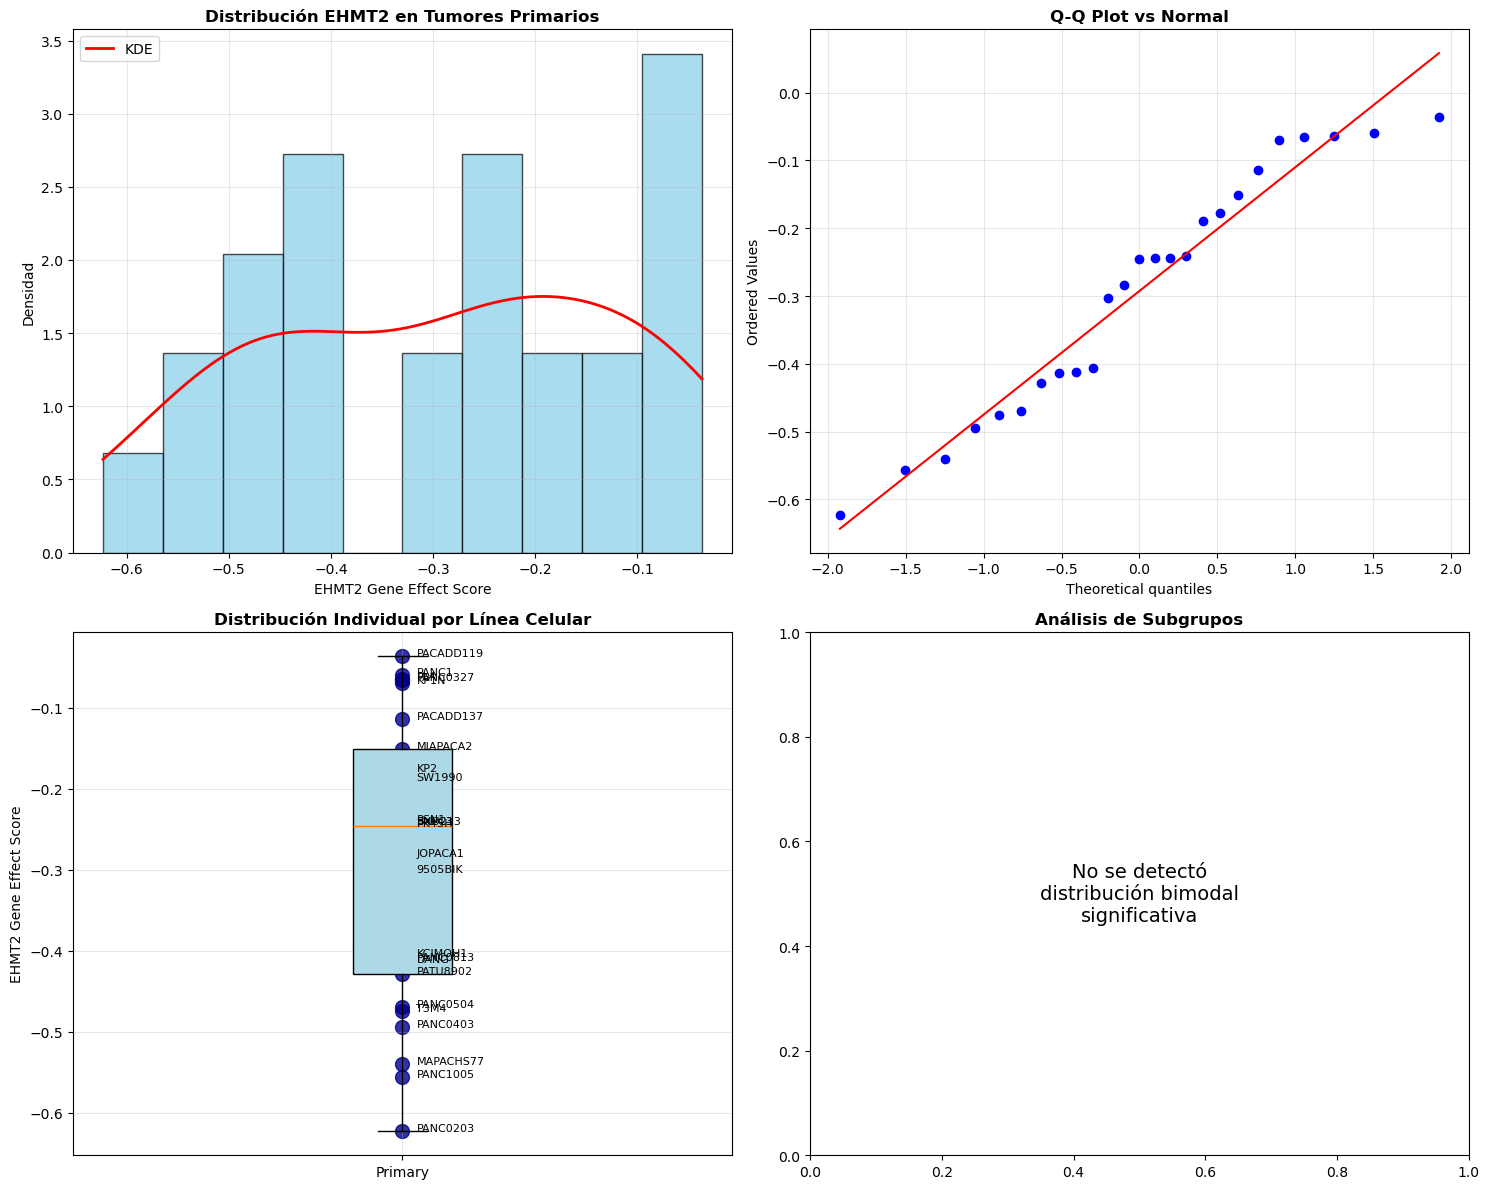


4. CONCLUSIÓN:
   No se detectó una distribución bimodal significativa.
   Los datos sugieren una distribución unimodal.


In [7]:
# Análisis detallado de la distribución bimodal de EHMT2 en tumores primarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde, normaltest, shapiro
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Usar los datos ya procesados de results_df (de la celda anterior)
if 'results_df' in locals() and not results_df.empty:
    print("=== ANÁLISIS DE DISTRIBUCIÓN BIMODAL EHMT2 EN TUMORES PRIMARIOS ===\n")
    
    # Filtrar datos de tumores primarios
    primary_data = results_df[results_df['Tumor_Type'] == 'Primary'].copy()
    ehmt2_primary = primary_data['EHMT2_effect'].values
    
    print(f"Número de líneas celulares primarias: {len(primary_data)}")
    print(f"Rango de valores EHMT2: {ehmt2_primary.min():.4f} a {ehmt2_primary.max():.4f}")
    print(f"Media: {ehmt2_primary.mean():.4f} ± {ehmt2_primary.std():.4f}")
    print(f"Mediana: {np.median(ehmt2_primary):.4f}")
    
    # 1. ANÁLISIS DE NORMALIDAD
    print("\n1. PRUEBAS DE NORMALIDAD:")
    shapiro_stat, shapiro_p = shapiro(ehmt2_primary)
    print(f"   Shapiro-Wilk: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
    
    if len(ehmt2_primary) >= 8:  # Normaltest requiere al menos 8 observaciones
        dagostino_stat, dagostino_p = normaltest(ehmt2_primary)
        print(f"   D'Agostino: χ² = {dagostino_stat:.4f}, p = {dagostino_p:.4f}")
    
    # 2. ANÁLISIS CON GAUSSIAN MIXTURE MODEL
    print("\n2. GAUSSIAN MIXTURE MODEL:")
    # Reshape para sklearn
    X = ehmt2_primary.reshape(-1, 1)
    
    # Probar modelos con 1, 2 y 3 componentes
    n_components_range = range(1, 4)
    models = []
    aic_scores = []
    bic_scores = []
    
    for n_comp in n_components_range:
        gmm = GaussianMixture(n_components=n_comp, random_state=42)
        gmm.fit(X)
        models.append(gmm)
        aic_scores.append(gmm.aic(X))
        bic_scores.append(gmm.bic(X))
        print(f"   {n_comp} componente(s): AIC = {gmm.aic(X):.2f}, BIC = {gmm.bic(X):.2f}")
    
    # Seleccionar mejor modelo (menor BIC)
    best_n_comp = n_components_range[np.argmin(bic_scores)]
    best_gmm = models[best_n_comp - 1]
    print(f"   → Mejor modelo: {best_n_comp} componente(s)")
    
    # 3. VISUALIZACIÓN COMPLETA
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 3a. Histograma con curva de densidad
    ax1 = axes[0, 0]
    ax1.hist(ehmt2_primary, bins=10, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Añadir curva de densidad estimada
    kde = gaussian_kde(ehmt2_primary)
    x_range = np.linspace(ehmt2_primary.min(), ehmt2_primary.max(), 100)
    ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    
    # Añadir componentes del GMM si es bimodal
    if best_n_comp == 2:
        colors = ['green', 'orange']
        for i in range(best_n_comp):
            weight = best_gmm.weights_[i]
            mean = best_gmm.means_[i, 0]
            std = np.sqrt(best_gmm.covariances_[i, 0, 0])
            component_curve = weight * stats.norm.pdf(x_range, mean, std)
            ax1.plot(x_range, component_curve, '--', color=colors[i], linewidth=2, 
                    label=f'Componente {i+1}: μ={mean:.3f}')
    
    ax1.set_title('Distribución EHMT2 en Tumores Primarios', fontweight='bold')
    ax1.set_xlabel('EHMT2 Gene Effect Score')
    ax1.set_ylabel('Densidad')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 3b. Q-Q plot para normalidad
    ax2 = axes[0, 1]
    stats.probplot(ehmt2_primary, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot vs Normal', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3c. Boxplot con puntos individuales
    ax3 = axes[1, 0]
    bp = ax3.boxplot(ehmt2_primary, patch_artist=True, labels=['Primary'])
    bp['boxes'][0].set_facecolor('lightblue')
    
    # Añadir puntos individuales con nombres
    for i, (_, row) in enumerate(primary_data.iterrows()):
        ax3.scatter(1, row['EHMT2_effect'], s=100, alpha=0.8, color='darkblue')
        ax3.annotate(row['Cell_Line'], (1, row['EHMT2_effect']), 
                    xytext=(10, 0), textcoords='offset points', fontsize=8, ha='left')
    
    ax3.set_title('Distribución Individual por Línea Celular', fontweight='bold')
    ax3.set_ylabel('EHMT2 Gene Effect Score')
    ax3.grid(True, alpha=0.3)
    
    # 3d. Clustering si es bimodal
    ax4 = axes[1, 1]
    if best_n_comp >= 2:
        # Usar el GMM para clasificar
        labels = best_gmm.predict(X)
        
        # Crear scatter plot con colores por cluster
        colors = ['red', 'blue', 'green'][:best_n_comp]
        for i in range(best_n_comp):
            mask = labels == i
            cluster_data = primary_data[mask]
            ax4.scatter(range(len(cluster_data)), cluster_data['EHMT2_effect'], 
                       c=colors[i], s=100, alpha=0.8, label=f'Subgrupo {i+1}')
            
            # Añadir nombres de líneas celulares
            for j, (_, row) in enumerate(cluster_data.iterrows()):
                ax4.annotate(row['Cell_Line'], (j, row['EHMT2_effect']), 
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        ax4.set_title('Clasificación en Subgrupos', fontweight='bold')
        ax4.set_xlabel('Líneas Celulares')
        ax4.set_ylabel('EHMT2 Gene Effect Score')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'No se detectó\ndistribución bimodal\nsignificativa', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=14)
        ax4.set_title('Análisis de Subgrupos', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 4. CARACTERIZACIÓN DE SUBGRUPOS (si es bimodal)
    if best_n_comp >= 2:
        print(f"\n4. CARACTERIZACIÓN DE SUBGRUPOS:")
        labels = best_gmm.predict(X)
        primary_data_copy = primary_data.copy()
        primary_data_copy['Subgrupo'] = [f'Subgrupo {label+1}' for label in labels]
        
        for i in range(best_n_comp):
            subgroup = primary_data_copy[primary_data_copy['Subgrupo'] == f'Subgrupo {i+1}']
            print(f"\n   {len(subgroup)} líneas celulares:")
            print(f"   EHMT2 promedio: {subgroup['EHMT2_effect'].mean():.4f} ± {subgroup['EHMT2_effect'].std():.4f}")
            print(f"   Rango: {subgroup['EHMT2_effect'].min():.4f} a {subgroup['EHMT2_effect'].max():.4f}")
            print(f"   Líneas celulares:")
            for _, row in subgroup.iterrows():
                print(f"     • {row['Cell_Line']}: {row['EHMT2_effect']:.4f}")
        
        # Comparar PRMT7 entre subgrupos
        print(f"\n5. COMPARACIÓN PRMT7 ENTRE SUBGRUPOS:")
        for i in range(best_n_comp):
            subgroup = primary_data_copy[primary_data_copy['Subgrupo'] == f'Subgrupo {i+1}']
            print(f"   Subgrupo {i+1} - PRMT7: {subgroup['PRMT7_effect'].mean():.4f} ± {subgroup['PRMT7_effect'].std():.4f}")
        
        # Test estadístico entre subgrupos para PRMT7
        if best_n_comp == 2:
            sub1_prmt7 = primary_data_copy[primary_data_copy['Subgrupo'] == 'Subgrupo 1']['PRMT7_effect']
            sub2_prmt7 = primary_data_copy[primary_data_copy['Subgrupo'] == 'Subgrupo 2']['PRMT7_effect']
            
            if len(sub1_prmt7) > 1 and len(sub2_prmt7) > 1:
                t_stat, p_val = stats.ttest_ind(sub1_prmt7, sub2_prmt7)
                print(f"   Test t entre subgrupos (PRMT7): t = {t_stat:.4f}, p = {p_val:.4f}")
        
        # 6. GRÁFICO DE CORRELACIÓN EHMT2 vs PRMT7 POR SUBGRUPOS
        plt.figure(figsize=(10, 6))
        colors_scatter = ['red', 'blue', 'green'][:best_n_comp]
        
        for i in range(best_n_comp):
            subgroup = primary_data_copy[primary_data_copy['Subgrupo'] == f'Subgrupo {i+1}']
            plt.scatter(subgroup['EHMT2_effect'], subgroup['PRMT7_effect'], 
                       c=colors_scatter[i], s=100, alpha=0.8, label=f'Subgrupo {i+1}')
            
            # Añadir nombres
            for _, row in subgroup.iterrows():
                plt.annotate(row['Cell_Line'], (row['EHMT2_effect'], row['PRMT7_effect']), 
                           xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
        plt.xlabel('EHMT2 Gene Effect Score')
        plt.ylabel('PRMT7 Gene Effect Score')
        plt.title('Correlación EHMT2 vs PRMT7 por Subgrupos (Tumores Primarios)', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Tabla resumen
        print(f"\n6. TABLA RESUMEN:")
        summary_table = primary_data_copy.groupby('Subgrupo')[['EHMT2_effect', 'PRMT7_effect']].agg(['count', 'mean', 'std']).round(4)
        print(summary_table)
    
    else:
        print(f"\n4. CONCLUSIÓN:")
        print("   No se detectó una distribución bimodal significativa.")
        print("   Los datos sugieren una distribución unimodal.")

else:
    print("❌ No se encontraron datos procesados. Ejecuta primero la celda anterior.")

Líneas celulares analizadas: 51
  Primary: 28
  Metastatic: 23

EHMT2:
  Primary: 4.501 ± 0.533 (n=28)
  Metastatic: 4.413 ± 0.633 (n=23)
  p-value: 0.5937

PRMT7:
  Primary: 4.815 ± 0.691 (n=28)
  Metastatic: 4.738 ± 0.676 (n=23)
  p-value: 0.6914


C:\Users\alvar\AppData\Local\Temp\ipykernel_1216\3016036947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='Tumor Type', y=gene, ax=ax, palette=colors)
C:\Users\alvar\AppData\Local\Temp\ipykernel_1216\3016036947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='Tumor Type', y=gene, ax=ax, palette=colors)


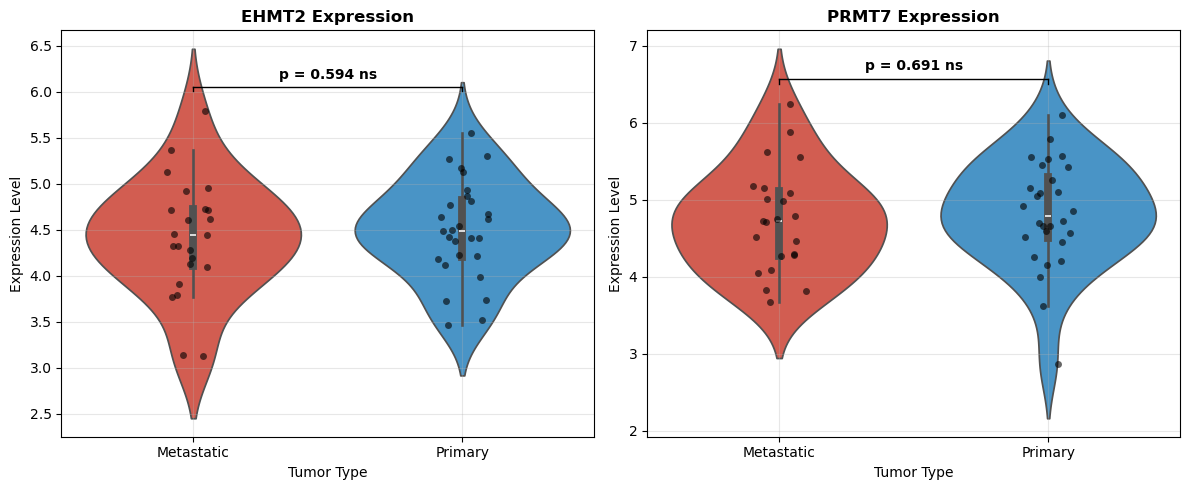

In [10]:
# Análisis de expresión génica EHMT2 y PRMT7 por tipo tumoral
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

try:
    # Cargar datos
    expr_df = pd.read_csv("../csv2/Expresion_genes_allCellLines_PDAC.csv")
    types_df = pd.read_csv("../csv2/cell_lines_PDAC.csv")
    
    # Filtrar solo líneas con tipo tumoral conocido (excluir Unknown)
    types_df = types_df[types_df['Tumor Type'] != 'Unknown']
    
    # Unir datasets usando DepMap ID
    merged_df = pd.merge(expr_df, types_df, 
                        left_on='Unnamed: 0', right_on='Depmap Id', 
                        how='inner')
    
    print(f"Líneas celulares analizadas: {len(merged_df)}")
    tumor_counts = merged_df['Tumor Type'].value_counts()
    for tumor_type, count in tumor_counts.items():
        print(f"  {tumor_type}: {count}")
    
    # Crear boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    colors = {'Primary': '#3498db', 'Metastatic': '#e74c3c'}
    
    genes = ['EHMT2', 'PRMT7']
    for i, gene in enumerate(genes):
        ax = axes[i]
        sns.violinplot(data=merged_df, x='Tumor Type', y=gene, ax=ax, palette=colors)
        sns.stripplot(data=merged_df, x='Tumor Type', y=gene, ax=ax, 
                     color='black', alpha=0.6, size=5)
        
        ax.set_title(f'{gene} Expression', fontweight='bold')
        ax.set_ylabel('Expression Level')
        ax.grid(True, alpha=0.3)
        
        # Estadísticas
        primary_data = merged_df[merged_df['Tumor Type'] == 'Primary'][gene]
        metastatic_data = merged_df[merged_df['Tumor Type'] == 'Metastatic'][gene]
        
        if len(primary_data) > 1 and len(metastatic_data) > 1:
            t_stat, p_value = ttest_ind(primary_data, metastatic_data)
            
            # Añadir p-valor al gráfico
            y_max = merged_df[gene].max()
            y_range = merged_df[gene].max() - merged_df[gene].min()
            y_pos = y_max + y_range * 0.1
            
            ax.plot([0, 1], [y_pos, y_pos], 'k-', linewidth=1)
            ax.plot([0, 0], [y_pos, y_pos - y_range * 0.02], 'k-', linewidth=1)
            ax.plot([1, 1], [y_pos, y_pos - y_range * 0.02], 'k-', linewidth=1)
            
            if p_value < 0.001:
                p_text = 'p < 0.001***'
            elif p_value < 0.01:
                p_text = f'p = {p_value:.3f}**'
            elif p_value < 0.05:
                p_text = f'p = {p_value:.3f}*'
            else:
                p_text = f'p = {p_value:.3f} ns'
            
            ax.text(0.5, y_pos + y_range * 0.02, p_text, ha='center', va='bottom', 
                   fontsize=10, fontweight='bold')
            
            # Imprimir estadísticas
            print(f"\n{gene}:")
            print(f"  Primary: {primary_data.mean():.3f} ± {primary_data.std():.3f} (n={len(primary_data)})")
            print(f"  Metastatic: {metastatic_data.mean():.3f} ± {metastatic_data.std():.3f} (n={len(metastatic_data)})")
            print(f"  p-value: {p_value:.4f}")
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")